<h1><center> Manga: Single Galaxy Calculations <center></h1>
<center> An attempt to get the H\delta_{a} and Dn4000 values for a single galaxy as a function of radius: once we get this running, we can modularize everything! <center>

In [1]:
import numpy as np
import pyfits
import math
from math import log10
import matplotlib.pyplot as plt
import scipy
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
from matplotlib import rc
import pickle
import os
import astropy as ap
from astropy.cosmology import WMAP7
from scipy import interpolate
import corner
import matplotlib.patheffects as patheffects
from matplotlib import rcParams
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from matplotlib import colors
from __future__ import unicode_literals
# rcParams["font.size"] = 16
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"

rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'

# rcParams['font.family'] = 'serif'
# rcParams['font.serif'] = 'Ubuntu'
# rcParams['font.monospace'] = 'Ubuntu Mono'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 22
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['legend.fontsize'] = 16
rcParams['figure.titlesize'] = 1


os.chdir('/Users/nitya/Work/Data/Project1/measurements')
file2 = open(r'SFRP.pkl', 'rb')
d = pickle.load(file2, encoding = 'latin')
file2.close()
np.shape(d)

ModuleNotFoundError: No module named 'pyfits'

In [2]:
#d.dtype.names

In [3]:
d4 = np.array(d['D4000'])
hd = np.array(d['AHDEW'])

# print(np.min(d4), np.max(d4))
# print(np.min(hd), np.max(hd))

# print(len(d4[d4>0]))
# print(len(hd[hd>-100.0]))

d4a = d4[np.where(d4>0)[0]]
hda = hd[np.where(d4>0)[0]]
print(len(d4a), len(hda))

d4 = d4a[np.where(hda>-50)[0]]
hd = hda[np.where(hda>-50)[0]]
print(len(d4), len(hd))



59617 59617
59485 59485


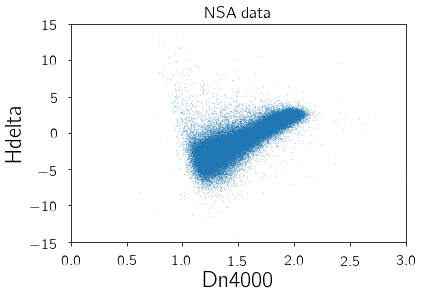

In [4]:
plt.scatter(d4, hd, s = 0.01)
plt.ylim(15.0,-15.0)
plt.xlim(0,3)
#plt.xlim()
plt.xlabel("Dn4000")
plt.ylabel("Hdelta")
plt.title("NSA data")
plt.show()

In [5]:
def mymap(a,b,c,d,e, x1,x2, y1,y2):
    t = binned_statistic_2d(a,b,c,statistic = 'count',bins = (100,100))
    yedges = t[1]
    xedges = t[2]
    number = np.ma.array(t[0], mask = t[0] == 0)
    number = np.log10(number)
    plt.pcolormesh(yedges,xedges,(np.transpose(number)),cmap = plt.cm.viridis_r)
    plt.colorbar()
    plt.xlabel(str(d))
    plt.ylabel(str(e))
    plt.xlim(x1,x2)
    plt.ylim(y1,y2)
    plt.show()



/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


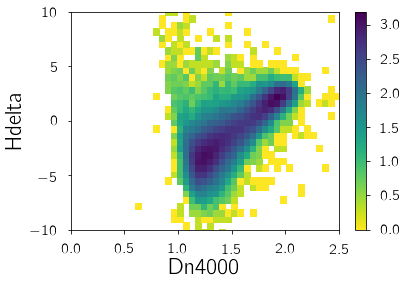

In [6]:
mymap(d4,hd,d4,'Dn4000', 'Hdelta', 0,2.5,-10.0,10.0)
# plt.ylim(-15.0,15.0)
# plt.xlim(0,3)
#plt.xlim()
# plt.show()

In [7]:
#Tjitske's Dn4000 and HdA code

import scipy.interpolate as interp
import h5py
import gc
import sys
import scipy.stats as st
import scipy.signal as sig
from scipy.optimize import curve_fit
import subprocess

def get_dn4000(wave,spec):
    interp_spec = interp.interp1d(wave,spec)
    blue_wav = np.linspace(3850,3950,100)
    red_wav = np.linspace(4000,4100,100)
    d4000 = np.sum(interp_spec(red_wav)) / np.sum(interp_spec(blue_wav))
    return d4000
 
def get_HdA(wave, spec):
    bandw_HdA = np.logical_and(wave > 4083.500, wave < 4122.250)   # analogous to MPA-JHU
    bandw_HdA_blueside = np.logical_and(wave > 4041.600, wave < 4079.750)
    bandw_HdA_redside = np.logical_and(wave > 4128.500, wave < 4161.000)
    spec_av_blueside = np.sum(spec[bandw_HdA_blueside])/len(spec[bandw_HdA_blueside])
    spec_av_redside = np.sum(spec[bandw_HdA_redside])/len(spec[bandw_HdA_redside])
    a_spec = (spec_av_redside - spec_av_blueside)/((4161.000+4128.500)/2 - (4079.750+4041.600)/2)
    b_spec = spec_av_blueside - a_spec * (4079.750+4041.600)/2
    spec_cont_HdA = wave[bandw_HdA] * a_spec + b_spec
    HdA = tsum(wave[bandw_HdA],np.divide((spec_cont_HdA - spec[bandw_HdA]), spec_cont_HdA))
    return HdA

def tsum(xin, yin):
    tsum = np.sum(np.abs((xin[1:]-xin[:-1]))*(yin[1:]+yin[:-1])/2. )
    return tsum

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
os.chdir("/Users/nitya/Work/Paper2/notebooks")
b = pyfits.open("spec-0266-51630-0172.fits")
b = b[1].data
print(b.columns)
print(np.shape(b['flux']))
print(b['flux'][0:10], 10**b['loglam'][0:10])


thing1 = get_dn4000(10**b['loglam'], b['flux'])
print(thing1)

thing2 = get_HdA(10**b['loglam'], b['flux'])
print(thing2)

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)
(3808,)
[ 5.6356206   2.7240665  -0.62176096 -2.2902942   4.6394234   6.942722
  3.3722546   2.7329364   4.8328743   4.9344068 ] [3824.724  3825.604  3826.4841 3827.3665 3828.2468 3829.1296 3830.0105
 3830.8938 3831.7751 3832.6565]
1.0209941187742375
-10.30648


In [9]:
b1 = pyfits.open("manga-8455-3701-LOGCUBE.fits")
print(b1.info())

print(b1['FLUX'].data.shape)
print(list(b1['FLUX'].header.keys()))

b2 = pyfits.open("manga-8455-3701-LOGCUBE-SPX-GAU-MILESHC.fits")
print(b2.info())

print(b2['FLUX'].data.shape)
print(list(b2['FLUX'].header.keys()))

#print(b)
#print(np.shape(b['flux']))
#print(b['flux'][0:10], 10**b['loglam'][0:10])

#thing1 = get_dn4000(10**b['loglam'], b['flux'])
#print(thing1)

#thing2 = get_HdA(10**b['loglam'], b['flux'])
#print(thing2)

Filename: manga-8455-3701-LOGCUBE.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      74   ()              
1    FLUX        ImageHDU        99   (44, 44, 4563)   float32   
2    IVAR        ImageHDU        17   (44, 44, 4563)   float32   
3    MASK        ImageHDU        17   (44, 44, 4563)   int32   
4    WAVE        ImageHDU         9   (4563,)      float64   
5    SPECRES     ImageHDU         9   (4563,)      float64   
6    SPECRESD    ImageHDU         9   (4563,)      float64   
7    OBSINFO     BinTableHDU    144   9R x 63C     [25A, 17A, 5A, J, I, 8A, E, E, E, E, E, E, J, J, I, J, E, 12A, J, 8A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 13A, E, E, E, E, D, D, D, D, E, E, J, J, J, E, E, E, E, J, J, E, E, E, E]   
8    GIMG        ImageHDU        28   (44, 44)     float32   
9    RIMG        ImageHDU        28   (44, 44)     float32   
10   IIMG        ImageHDU        28   (44, 44)     float32   
11   ZIMG        ImageHDU

22 22


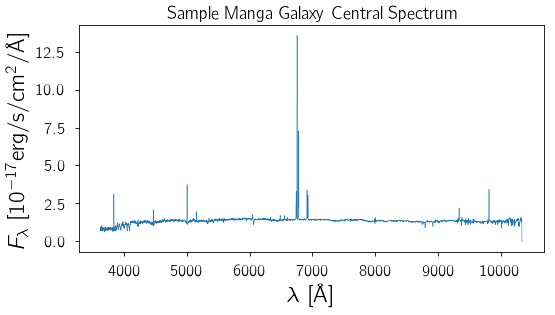

In [20]:
NL, NY, NX = b1['FLUX'].data.shape # unpack shape tuple
X_ctr, Y_ctr = NX // 2, NY // 2

print(X_ctr, Y_ctr)

plt.figure(figsize=(8, 4), dpi=75)
plt.plot(b1['WAVE'].data, b1['FLUX'].data[:, X_ctr, Y_ctr], drawstyle='steps-mid', linewidth=0.5)
plt.xlabel(r'$\lambda ~ [{\rm\AA}]$')
plt.ylabel(r'$F_{\lambda} ~ [10^{-17} {\rm erg/s/cm^2/\AA}]$')
plt.title("Sample Manga Galaxy Central Spectrum")
plt.show()

In [11]:
#NL, NY, NX = b1['FLUX'].data.shape 
#NL, NY, NX = b1['WAVE'].data.shape 



In [12]:
print(b1['WAVE'].data)

print(len(b1['FLUX'].data[:, X_ctr, Y_ctr]))

thing1 = get_dn4000(b1['WAVE'].data,b1['FLUX'].data[:, X_ctr, Y_ctr])
print(thing1)

thing2 = get_HdA(b1['WAVE'].data, b1['FLUX'].data[:, X_ctr, Y_ctr])
print(thing2)

[ 3621.59598486  3622.42998417  3623.26417553 ... 10349.03843826
 10351.42166679 10353.80544415]
4563
1.1081546563667737
0.8350754381351213


In [13]:
print(NL,NX,NY)

4563 44 44


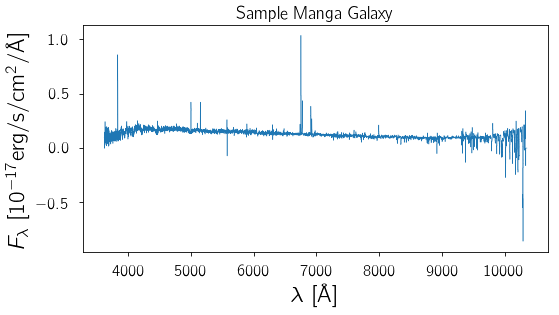

In [14]:
plt.figure(figsize=(8, 4), dpi=75)
plt.plot(b1['WAVE'].data, b1['FLUX'].data[:, 13,14], drawstyle='steps-mid', linewidth=0.5)
plt.xlabel(r'$\lambda ~ [{\rm\AA}]$')
plt.ylabel(r'$F_{\lambda} ~ [10^{-17} {\rm erg/s/cm^2/\AA}]$')
plt.title("Sample Manga Galaxy")
plt.show()

In [15]:
d4a = []
hdaa = []
for i in range(NX):
    for j in range(NY):
        d4a.append(get_dn4000(b1['WAVE'].data,b1['FLUX'].data[:, i, j]))
        hdaa.append(get_HdA(b1['WAVE'].data, b1['FLUX'].data[:, i, j]))


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


In [16]:

d4a = np.array(d4a).ravel()
hdaa = np.array(hdaa).ravel()

d4b = d4a[np.where(d4a>0)[0]]
hdb = hdaa[np.where(d4a>0)[0]]
print(len(d4b), len(hdb))

d4a = d4b[np.where(hdb>-20 )[0]]
hdaa = hdb[np.where(hdb>-20)[0]]
print(len(d4a), len(hda))




1093 1093
1088 59617


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


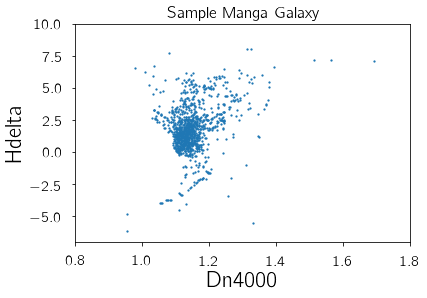

In [17]:

plt.scatter(d4a, hdaa, s = 1.5)
plt.ylim(-7.0,10.0)
plt.xlim(0.8,1.8)
plt.xlabel("Dn4000")
plt.ylabel("Hdelta")
plt.title("Sample Manga Galaxy")
#plt.xlim()
plt.show()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


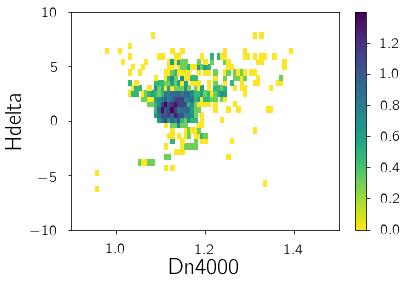

In [18]:
d4ab = d4a[np.isfinite(d4a)]
hdab = hdaa[np.isfinite(d4a)]
mymap(d4ab,hdab,d4ab,'Dn4000', 'Hdelta', 0.9,1.5,-10.0,10.0)

In [19]:
print(b1['FLUX'].data[44])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
